In [41]:
import matplotlib.pyplot as plt
import pandas.plotting as pd_plot
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
rd = np.load('./proyecto_training_data.npy')
df = pd.DataFrame(rd, columns=['Salesprice','Overall Quality','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Salesprice  Overall Quality  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0              7.0     856.0             8.0     2003.0   
1       181500.0              6.0    1262.0             6.0     1976.0   
2       223500.0              7.0     920.0             6.0     2001.0   
3       140000.0              7.0     961.0             7.0     1915.0   
4       250000.0              8.0    1145.0             9.0     2000.0   
...          ...              ...       ...             ...        ...   
1455    175000.0              6.0     953.0             7.0     1999.0   
1456    210000.0              6.0    2073.0             7.0     1978.0   
1457    266500.0              7.0    1188.0             9.0     1941.0   
1458    142125.0              5.0    1078.0             5.0     1950.0   
1459    147500.0              5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            60.0  
4          

In [11]:
df80 = df.iloc [0:int(0.8*len(df)),0:5]
df20 = df.iloc [int(0.8*len(df)):len(df),0:5]
#codigo para la informacion descriptiva
maxi=df.max()
mini=corr_matrix.min()
print(media,maxi,min)
df80.describe()

Salesprice         0.634209
Overall Quality    0.586438
1stFlrSF           0.538460
TotalRmsAbvGrd     0.469729
YearBuilt          0.432691
LotFrontage        0.422679
dtype: float64 Salesprice         755000.0
Overall Quality        10.0
1stFlrSF             4692.0
TotalRmsAbvGrd         14.0
YearBuilt            2010.0
LotFrontage           313.0
dtype: float64 <built-in function min>


,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199
std,78815.697902,1.378025,373.780374,1.609141,29.951707
min,34900.000000,1.000000,334.000000,2.000000,1875.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000


In [12]:
df80.describe()
rango = df80.max()-df80.min()
rango

Salesprice         720100.0
Overall Quality         9.0
1stFlrSF             2894.0
TotalRmsAbvGrd         12.0
YearBuilt             135.0
dtype: float64

In [15]:
corr_matrix = df.corr()
print(type(corr_matrix))

<class 'pandas.core.frame.DataFrame'>


In [16]:
corr_matrix

,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt,LotFrontage
Salesprice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
Overall Quality,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotalRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


In [17]:
corr_matrix.Salesprice

Salesprice         1.000000
Overall Quality    0.790982
1stFlrSF           0.605852
TotalRmsAbvGrd     0.533723
YearBuilt          0.522897
LotFrontage        0.351799
Name: Salesprice, dtype: float64

In [19]:
corr_matrix.Salesprice[1:]

Overall Quality    0.790982
1stFlrSF           0.605852
TotalRmsAbvGrd     0.533723
YearBuilt          0.522897
LotFrontage        0.351799
Name: Salesprice, dtype: float64

In [20]:
corr_matrix.Salesprice[1:].max()

0.7909816005838053

In [21]:
corr_matrix[corr_matrix.Salesprice==corr_matrix.Salesprice[1:].max()]

,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt,LotFrontage
Overall Quality,0.790982,1.0,0.476224,0.427452,0.572323,0.251646


In [22]:
corr_matrix[corr_matrix.Salesprice==corr_matrix.Salesprice[1:].max()].Salesprice

Overall Quality    0.790982
Name: Salesprice, dtype: float64

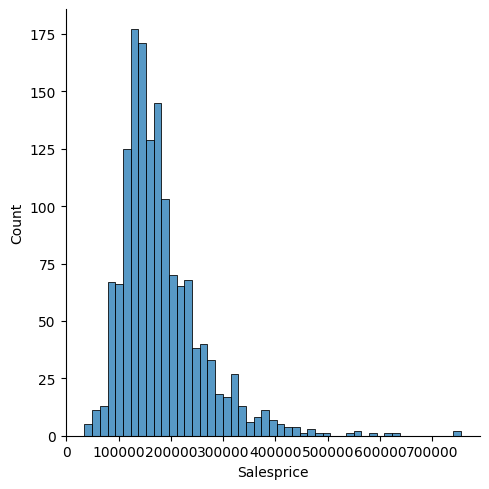

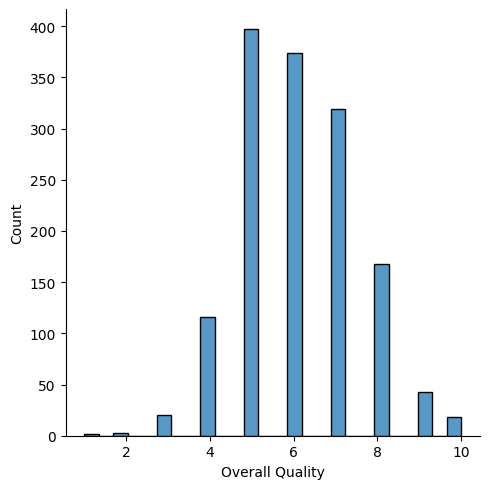

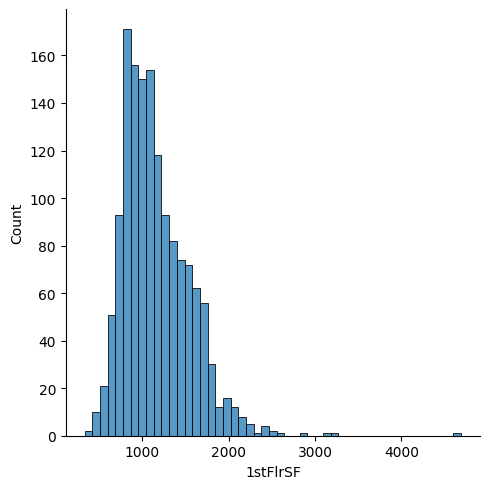

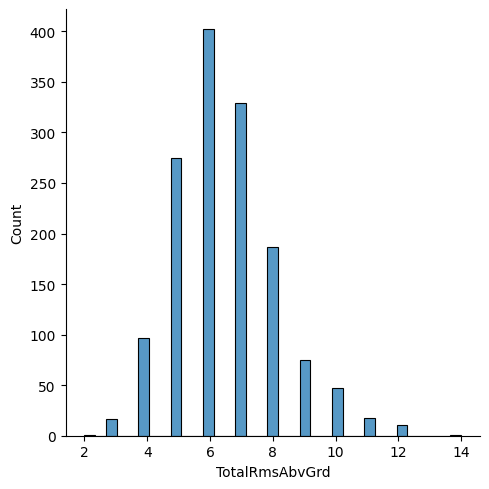

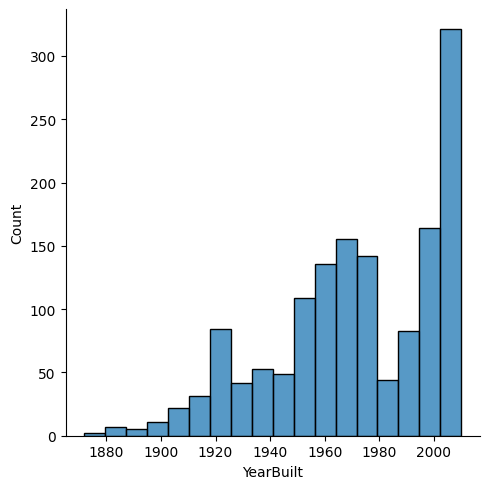

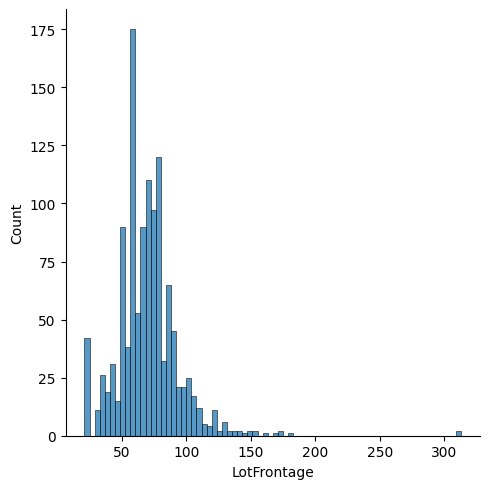

In [35]:
sns.displot(df.iloc[:,0])
sns.displot(df.iloc[:,1])
sns.displot(df.iloc[:,2])
sns.displot(df.iloc[:,3])
sns.displot(df.iloc[:,4])
sns.displot(df.iloc[:,5])

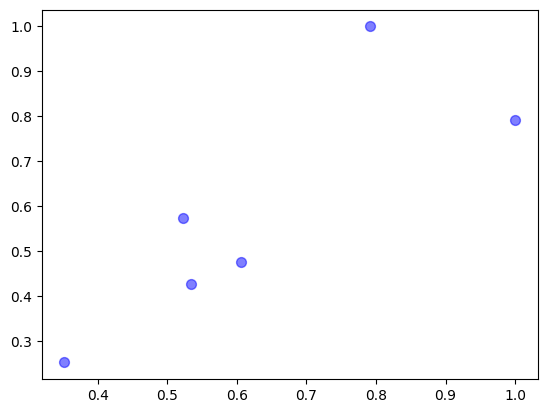

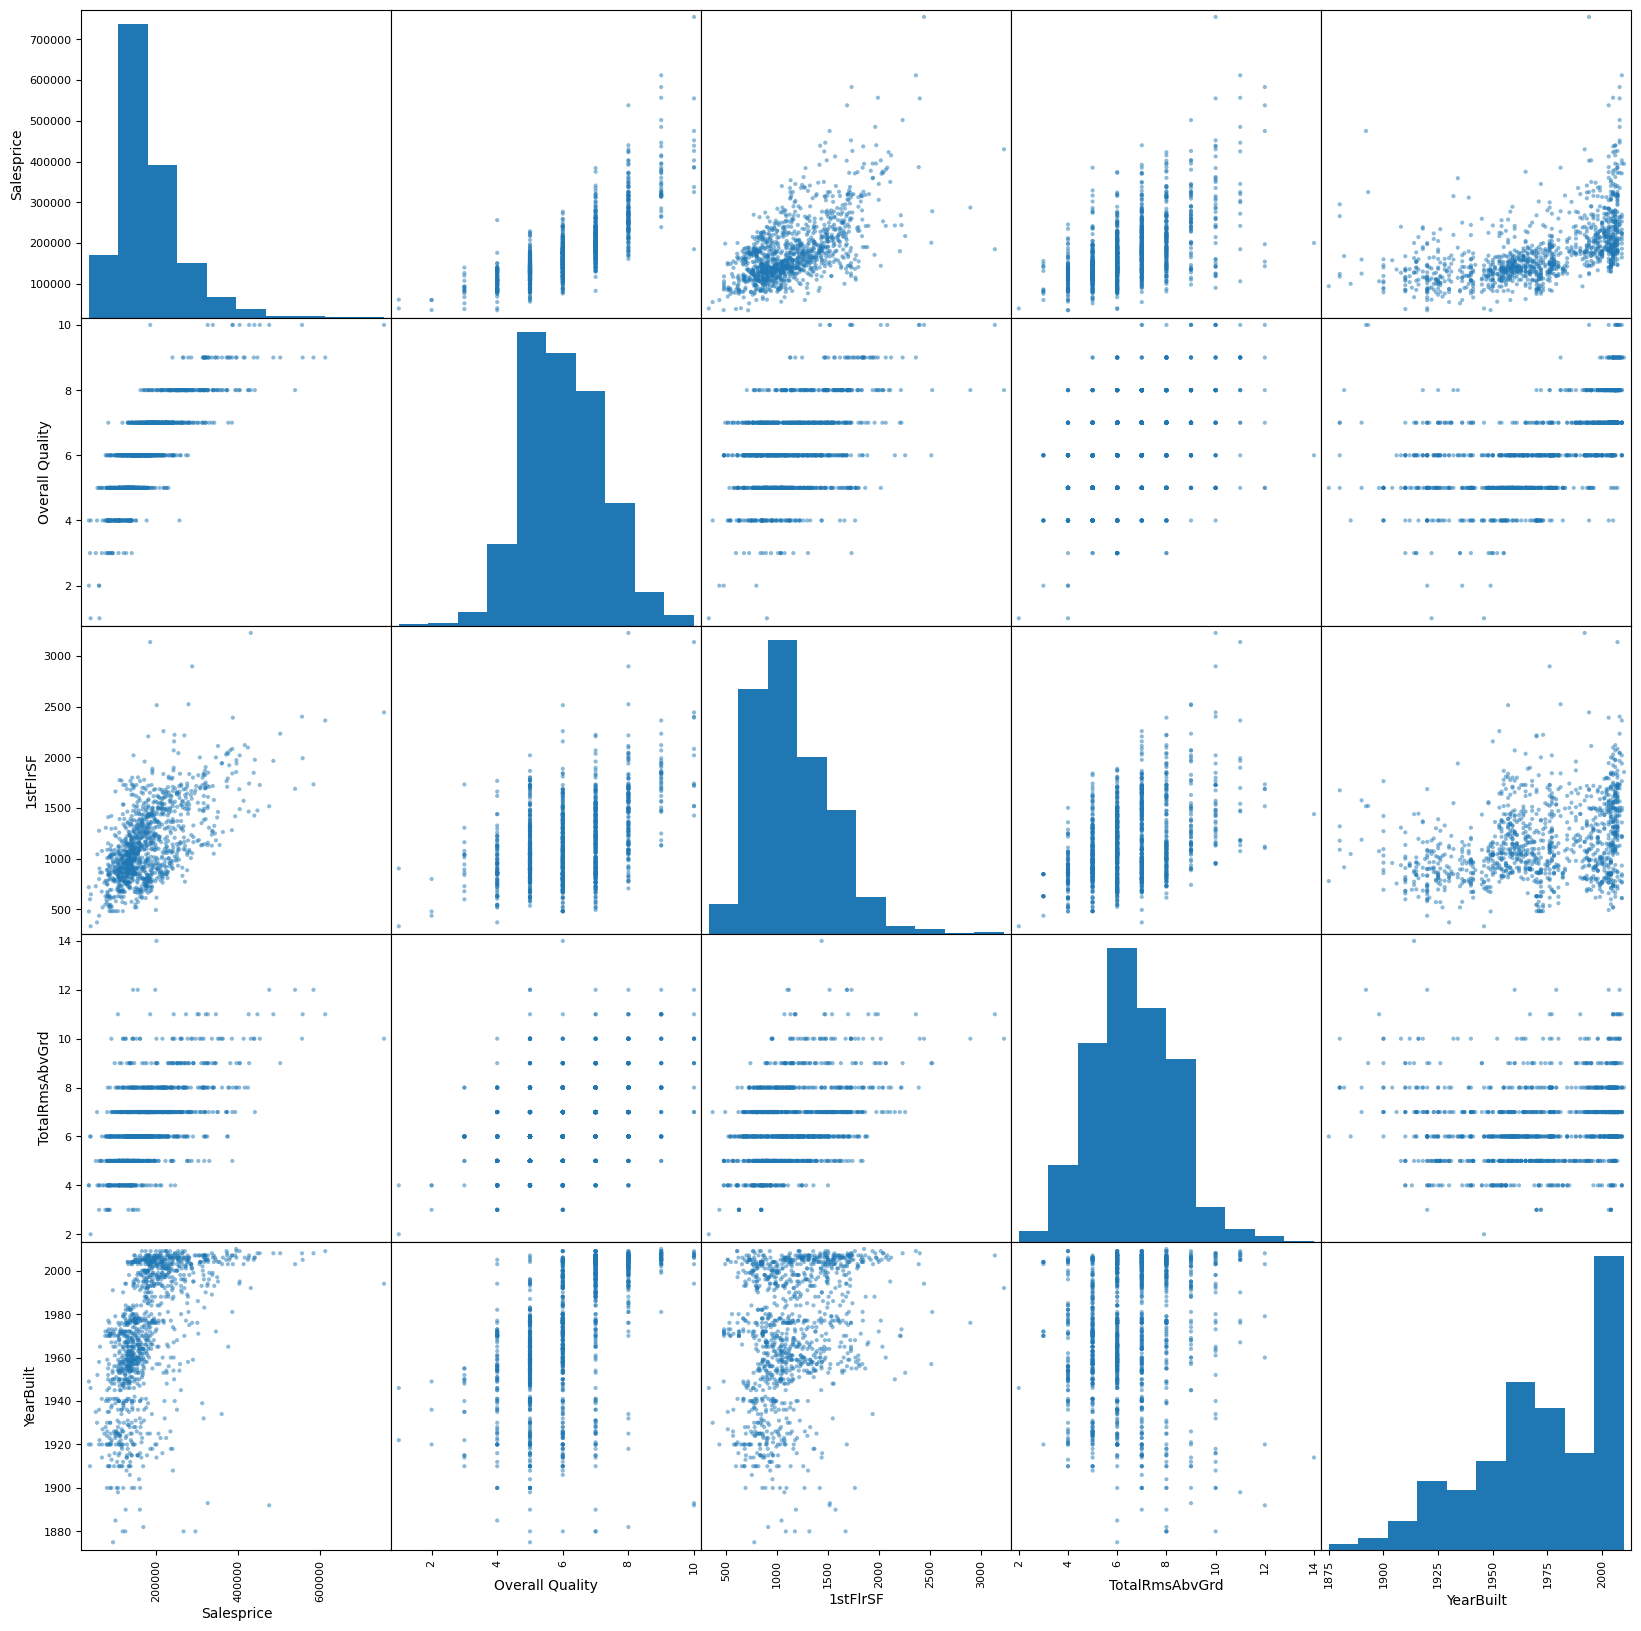

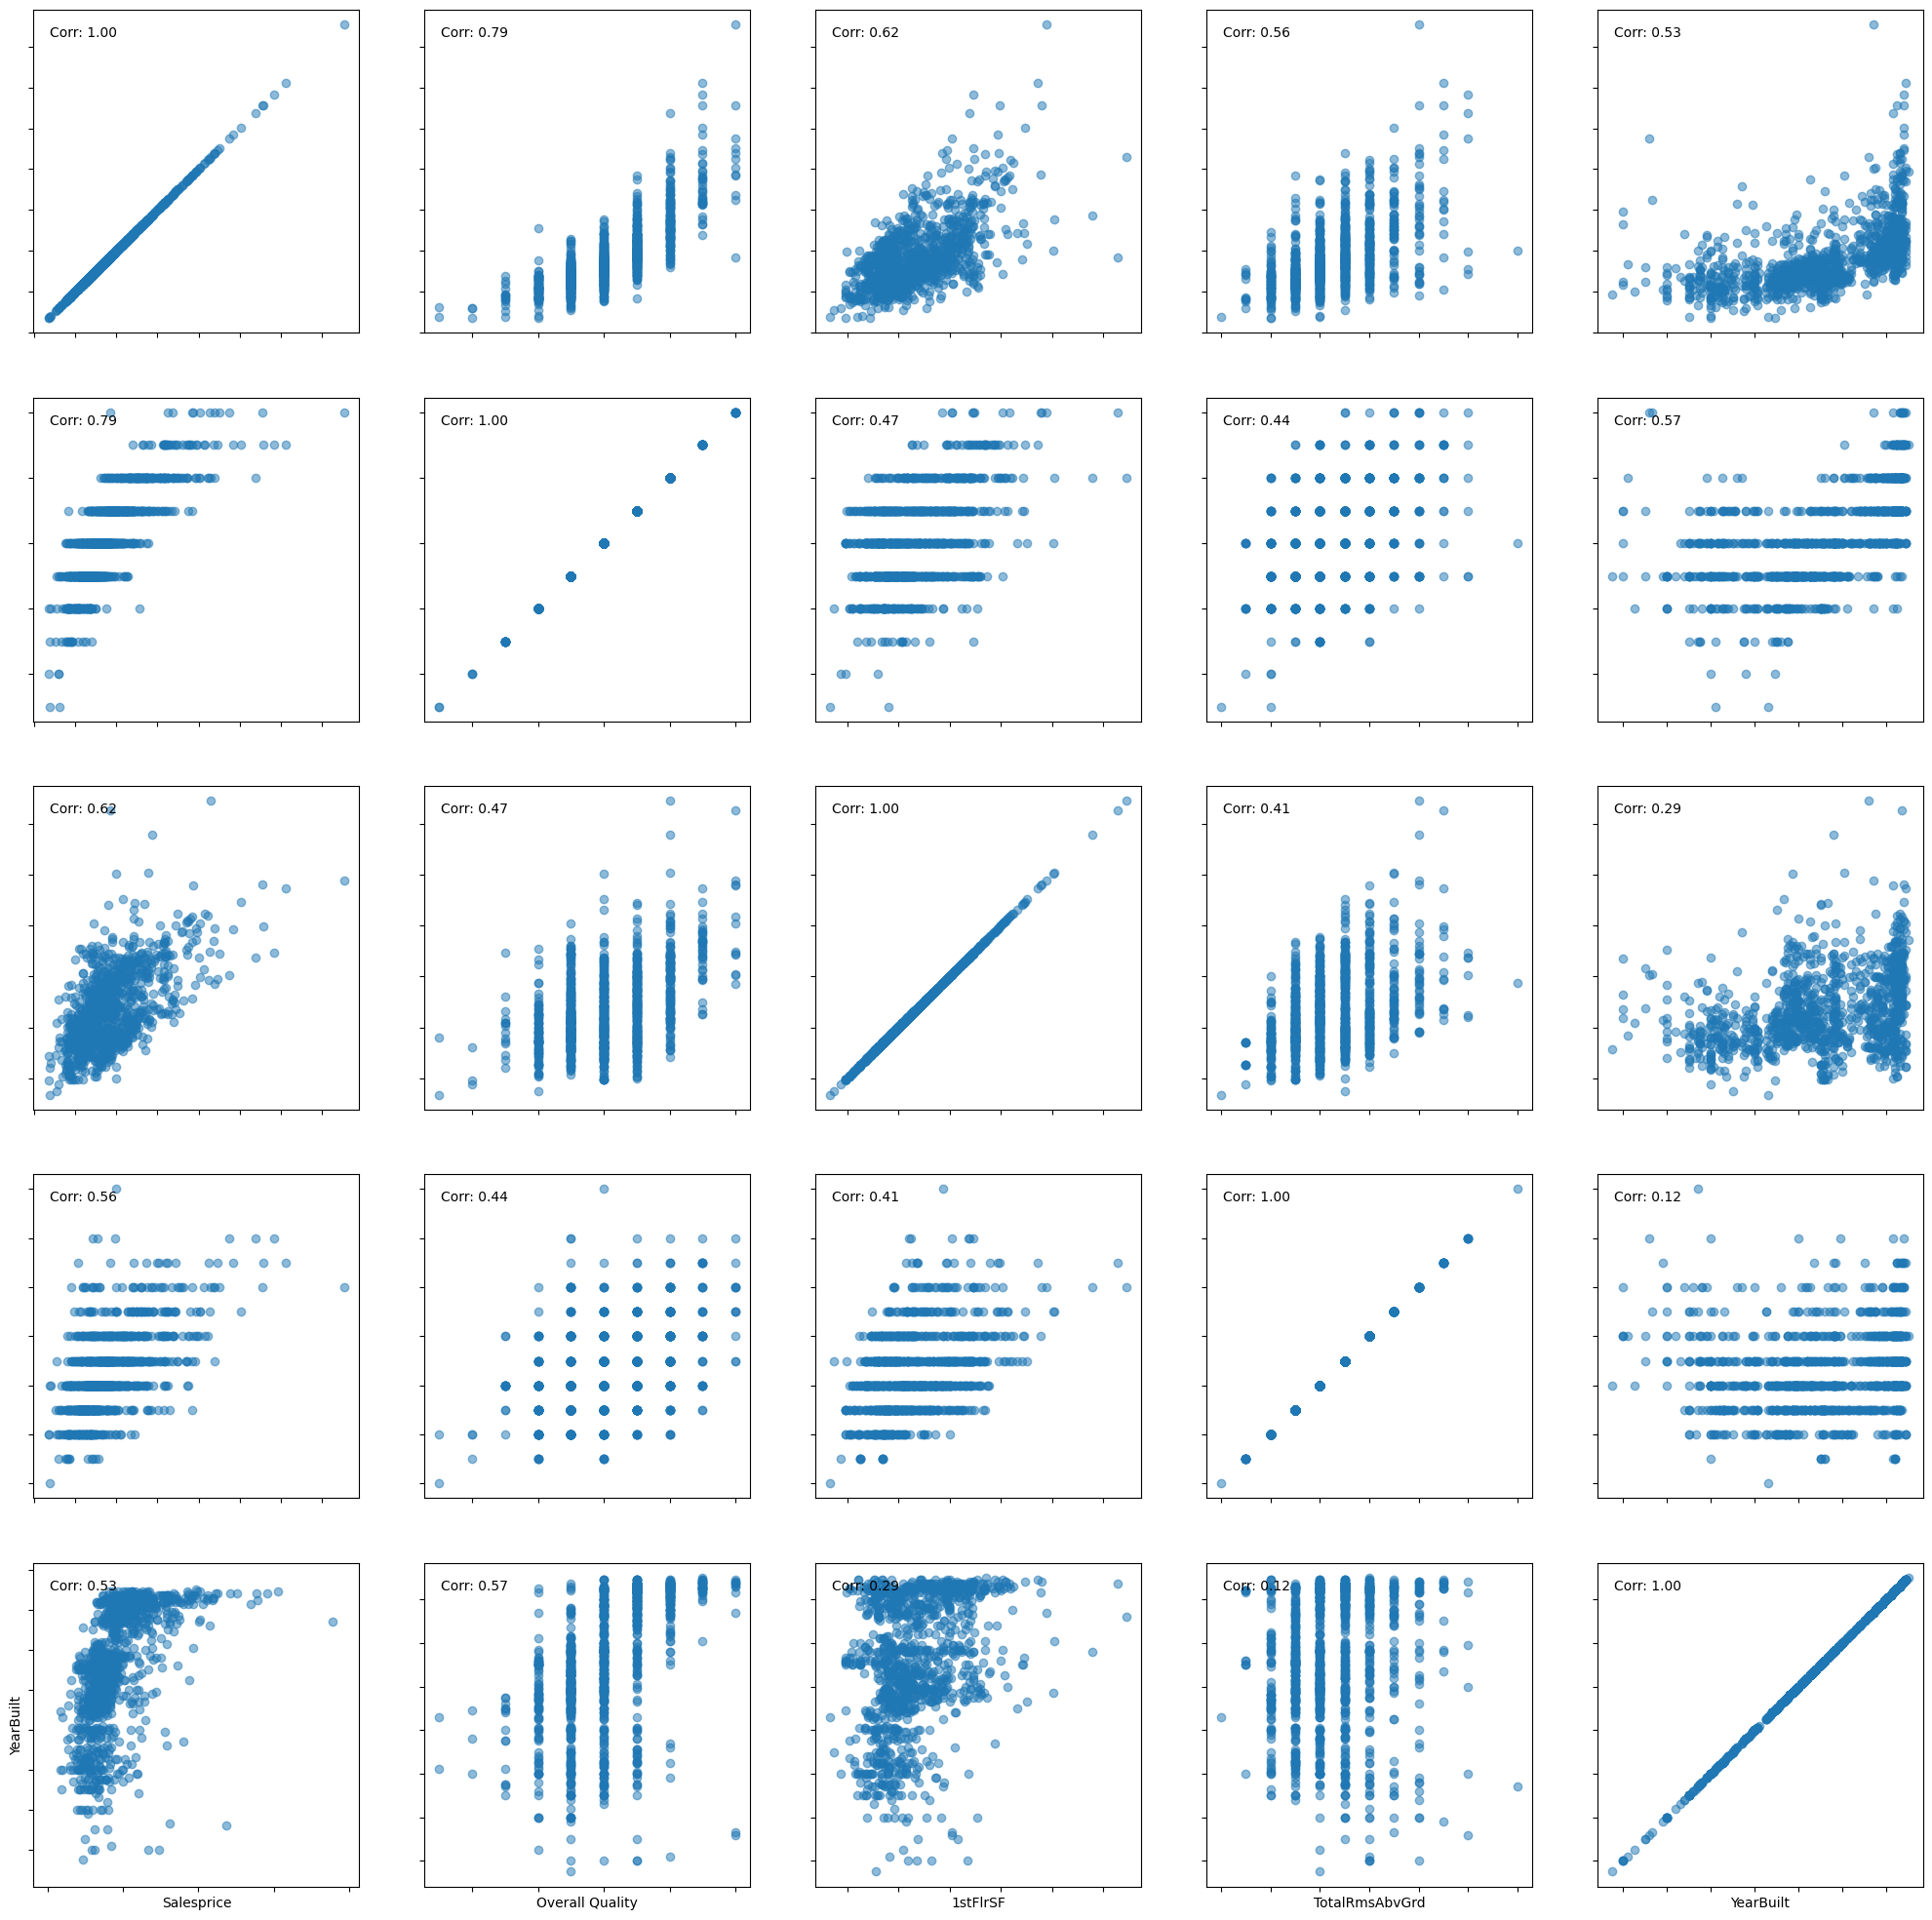

In [51]:
fig,ax = plt.subplots()
ax.scatter(corr_matrix.Salesprice, corr_matrix['Overall Quality'], s=50, c='blue', alpha=0.5)
plt.show()
ax.set_xlabel('Overall Qualilty')
ax.set_ylabel('Sales Price')
ax.set_title('Sales price vs Overall Quality')
pd_plot.scatter_matrix(df80, figsize=(20, 20))
plt.show()
# Crear una matriz de gráficos de dispersión y histogramas 
fig, axs = plt.subplots(len(df80.columns), len(df80.columns), figsize=(25, 25))  
# Iterar sobre todas las combinaciones de columnas 
for i in range(len(df80.columns)):     
    for j in range(len(df80.columns)):         
        # Crear un gráfico de dispersión o histograma para cada combinación de columnas 
                axs[i,j].scatter(df80[df80.columns[j]], df80[df80.columns[i]], alpha=0.5)         
                axs[i,j].xaxis.set_tick_params(labelbottom=False)         
                axs[i,j].yaxis.set_tick_params(labelleft=False)  
        # Calcular la correlación y agregarla como texto en el gráfico         
               # corrcoef = np.corrcoef(df80[df80.columns[j]], df80[df80.columns[i]])[0, 1]  
                corrcoef = df80.corr().iloc[i,j]
       
                axs[i,j].text(0.05, 0.95, f"Corr: {corrcoef:.2f}", transform=axs[i,j].transAxes,ha="left", va="top") 
                # Añadir etiquetas a los ejes         
                if i == len(df80.columns)-1:             
                    axs[i,j].set_xlabel(df80.columns[j])         
                    if j == 0:             
                        axs[i,j].set_ylabel(df80.columns[i])         
                        if i == 0 and j == 0:             
                            axs[i,j].set_title(df80.columns[j])    
                        # Ajustar los límites de los ejes         
                        x_min, x_max = df80[df80.columns[j]].min(), df80[df80.columns[j]].max()         
                        y_min, y_max = df80[df80.columns[i]].min(), df80[df80.columns[i]].max()         
                        x_margin, y_margin = (x_max-x_min)*0.1, (y_max-y_min)*0.1
                        axs[i,j].set_xlim(x_min-x_margin, x_max+x_margin)
                        axs[i,j].set_ylim(y_min-y_margin, y_max+y_margin)
plt.show()

C:\Users\René\AppData\Local\Temp\ipykernel_17716\2987144244.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\René\AppData\Local\Temp\ipykernel_17716\2987144244.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(overq,sales,cmap='Greens',edgecolors='black',linewidths=1,alpha=0.75)


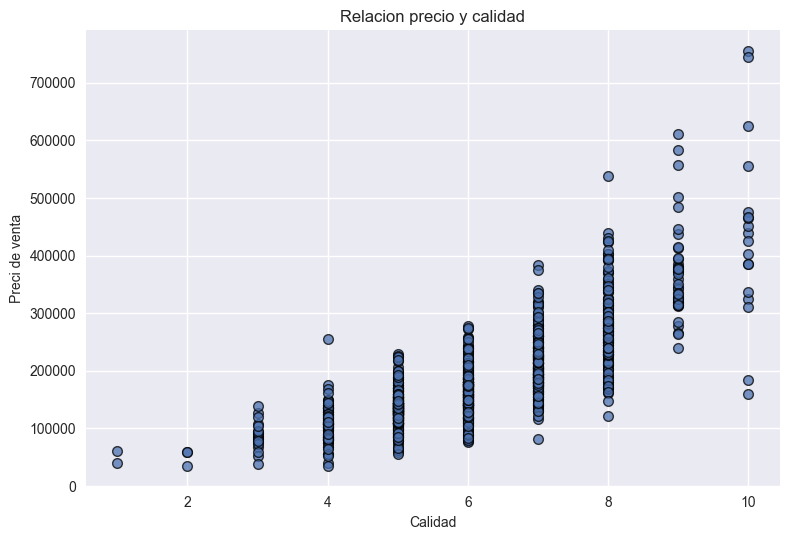

In [13]:
plt.style.use('seaborn')
sales = df['Salesprice']
overq = df['Overall Quality']
fi= df['1stFlrSF']
totalr  = df['TotalRmsAbvGrd']
yea = df['YearBuilt']
lo = df['LotFrontage']
plt.scatter(overq,sales,cmap='Greens',edgecolors='black',linewidths=1,alpha=0.75)
plt.xlabel('Calidad')
plt.ylabel('Preci de venta')
plt.title('Relacion precio y calidad')
plt.tight_layout()

In [25]:
len(pd.__dict__)

141

In [23]:
!git add .
!git commit -m "creacion de la matriz de correlacion y funcion de correlacion"
!git push

[main 6c91d1b] creacion de la matriz de correlacion y funcion de correlacion
 1 file changed, 38 insertions(+), 4 deletions(-)


To https://github.com/Senryo1/proyecto.git
   402d83e..6c91d1b  main -> main


In [32]:
!git log
!pip install seaborn

commit 6c91d1bfa37346d18187f817bd580091641d4686
Author: Rene Garcia-Salas <renegs19992@gmail.com>
Date:   Fri Mar 3 23:04:41 2023 -0600

    creacion de la matriz de correlacion y funcion de correlacion

commit 402d83ea6e543fbdc225a3557d436f015ae1331b
Author: Rene Garcia-Salas <renegs19992@gmail.com>
Date:   Tue Feb 28 22:06:22 2023 -0600

    informacion descriptiva agregada

commit 547321a5e5170da24fcd4957528f77ff39aa7533
Author: Rene Garcia-Salas <renegs19992@gmail.com>
Date:   Tue Feb 28 21:57:50 2023 -0600

    primer commit sin errores y en 3.9

commit 5b4080a3b4faf8911441effc7cbfbec446cec6a2
Author: Rene Garcia-Salas <renegs19992@gmail.com>
Date:   Tue Feb 28 21:55:05 2023 -0600

    este es mi primer commit

commit e974b6b6cad9cc1f356bb2e0454cc6479e9be478
Author: Senryo1 <69064562+Senryo1@users.noreply.github.com>
Date:   Tue Feb 28 21:04:03 2023 -0600

    Initial commit
